# Food consumption

## Jako były kucharz i osoba siedząca w tematach jedzenia i wina w tym notebooku zajmę się analizą bazy danych z WHO na temat konsumpcji jedzenia na świecie czyli preferencji jedzeniowych, różnic między krajami, kobietami i mężczyznami. Myślę że bardzo ciekawe informacje tutaj wyciągnę i będzie można sie dowiedzieć dużo. coś jeszcze? 
### Najpierw sprawdzę:
1. jak baza danych jest skonstruowana, jakie zawiera informacje, jakie typy danych sie w niej znajdują, czy są puste dane wiec już na pierwszym kroku będzie ciekawie
1. następnie jakie poroblemy w mogą w niej wystąpić i co należy wyczyścić żeby móc z niej wygodnie korzystać 
1. pozbyć sie niepotrzebnych danych
1. kolejnym krokiem będzie znajdowanie potrzebnych danych oraz może znalezienie nowych ciekawych
1. a ostatecznie wizualizaja tych danych zeby łatwo móc widzieć tendencje które zaszly
1. I ostatni krok czyli podsumowanie, tutaj wyciągnę wnioski, 
1. co jeszcze?
1. czy bede robić to na wszystkich krajach czy wybiore konkretne?
1. jakie problemy napotkałem
1. do argumentacji można użyć tego badania https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3490048/


In [644]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [645]:
food=pd.read_csv("fullcifocoss.csv", on_bad_lines='skip', sep=';', skipinitialspace = True)
pd.set_option('display.max_columns', None) # sprawiam że można przejżeć wszystkie columny ponieważ deafaultowo jest ograniczona ilość wyświetlanych kolumn
food.head(19)

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
5,0,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,8.33,100.00,116.67,133.33,NaN,32219,0.15,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
6,0,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,6.67,66.67,83.33,116.67,NaN,66172,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
7,0,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,3.33,66.67,83.33,100.00,NaN,33953,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
8,0,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,8.33,83.33,116.67,166.67,NaN,32219,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
9,0,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,8.33,183.33,358.33,500.00,NaN,66172,3.18,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


### ustawię jeszcze żeby na pewno wszystkie liczby miały 2 liczby po przecinku bo wolę taki wygląd a wrazie potrzeb zawsze mogę wrócić do deafaultowych ustawień

In [646]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
food.head()

,BW,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Consumers_P05,Consumers_P90,Consumers_P95,Consumers_P975,Consumers_Standard_deviation,Number_of_subjects,Total_Mean,Total_Median,Total_P05,Total_P90,Total_P95,Total_P975,Total_Standard_deviation,ExtBW,ExtBWValue
0,0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,8.33,116.67,150.00,166.67,NaN,66172,1.06,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
1,0,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,8.33,116.67,133.33,158.33,NaN,33953,1.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
2,0,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,10.00,133.33,158.33,166.67,NaN,32219,1.12,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
3,0,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,8.33,100.00,116.67,158.33,NaN,66172,0.14,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN
4,0,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,8.33,83.33,116.67,183.33,NaN,33953,0.13,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN


### usuwam duplikaty

In [647]:
food.shape

(544686, 26)

In [648]:
food = food.drop_duplicates()

In [649]:
food.shape

(544686, 26)

In [650]:
544686-523276 

21410

### pozbyliśmy się 21410 duplikatów

### Dla ułatwienia przeglądania dataframe usuwam te kolumny które na pewno nie będą potrzebne

In [651]:
food.drop(columns=food.loc[:, 'Consumers_P05':'Consumers_Standard_deviation'], inplace=True)
food.drop(columns=food.loc[:, 'Total_P05':'ExtBWValue'], inplace=True)
food = food.drop(['BW'], axis=1)
food.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00
1,China,2002,A000G,Oat grain,All,All,female,608,55.87,0.00,33953,1.00,0.00
2,China,2002,A000G,Oat grain,All,All,male,549,65.89,0.00,32219,1.12,0.00
3,China,2002,A000N,Buckwheat,All,All,All,167,55.26,0.00,66172,0.14,0.00
4,China,2002,A000N,Buckwheat,All,All,female,82,54.71,0.00,33953,0.13,0.00
5,China,2002,A000N,Buckwheat,All,All,male,85,55.80,0.00,32219,0.15,0.00
6,China,2002,A000P,Barley grains,All,All,All,61,38.58,0.00,66172,NaN,0.00
7,China,2002,A000P,Barley grains,All,All,female,28,37.50,0.00,33953,NaN,0.00
8,China,2002,A000P,Barley grains,All,All,male,33,39.49,0.00,32219,NaN,0.00
9,China,2002,A000T,Maize grain,All,All,All,2422,86.97,0.00,66172,3.18,0.00


In [652]:
food.shape

(544686, 13)

<Axes: >

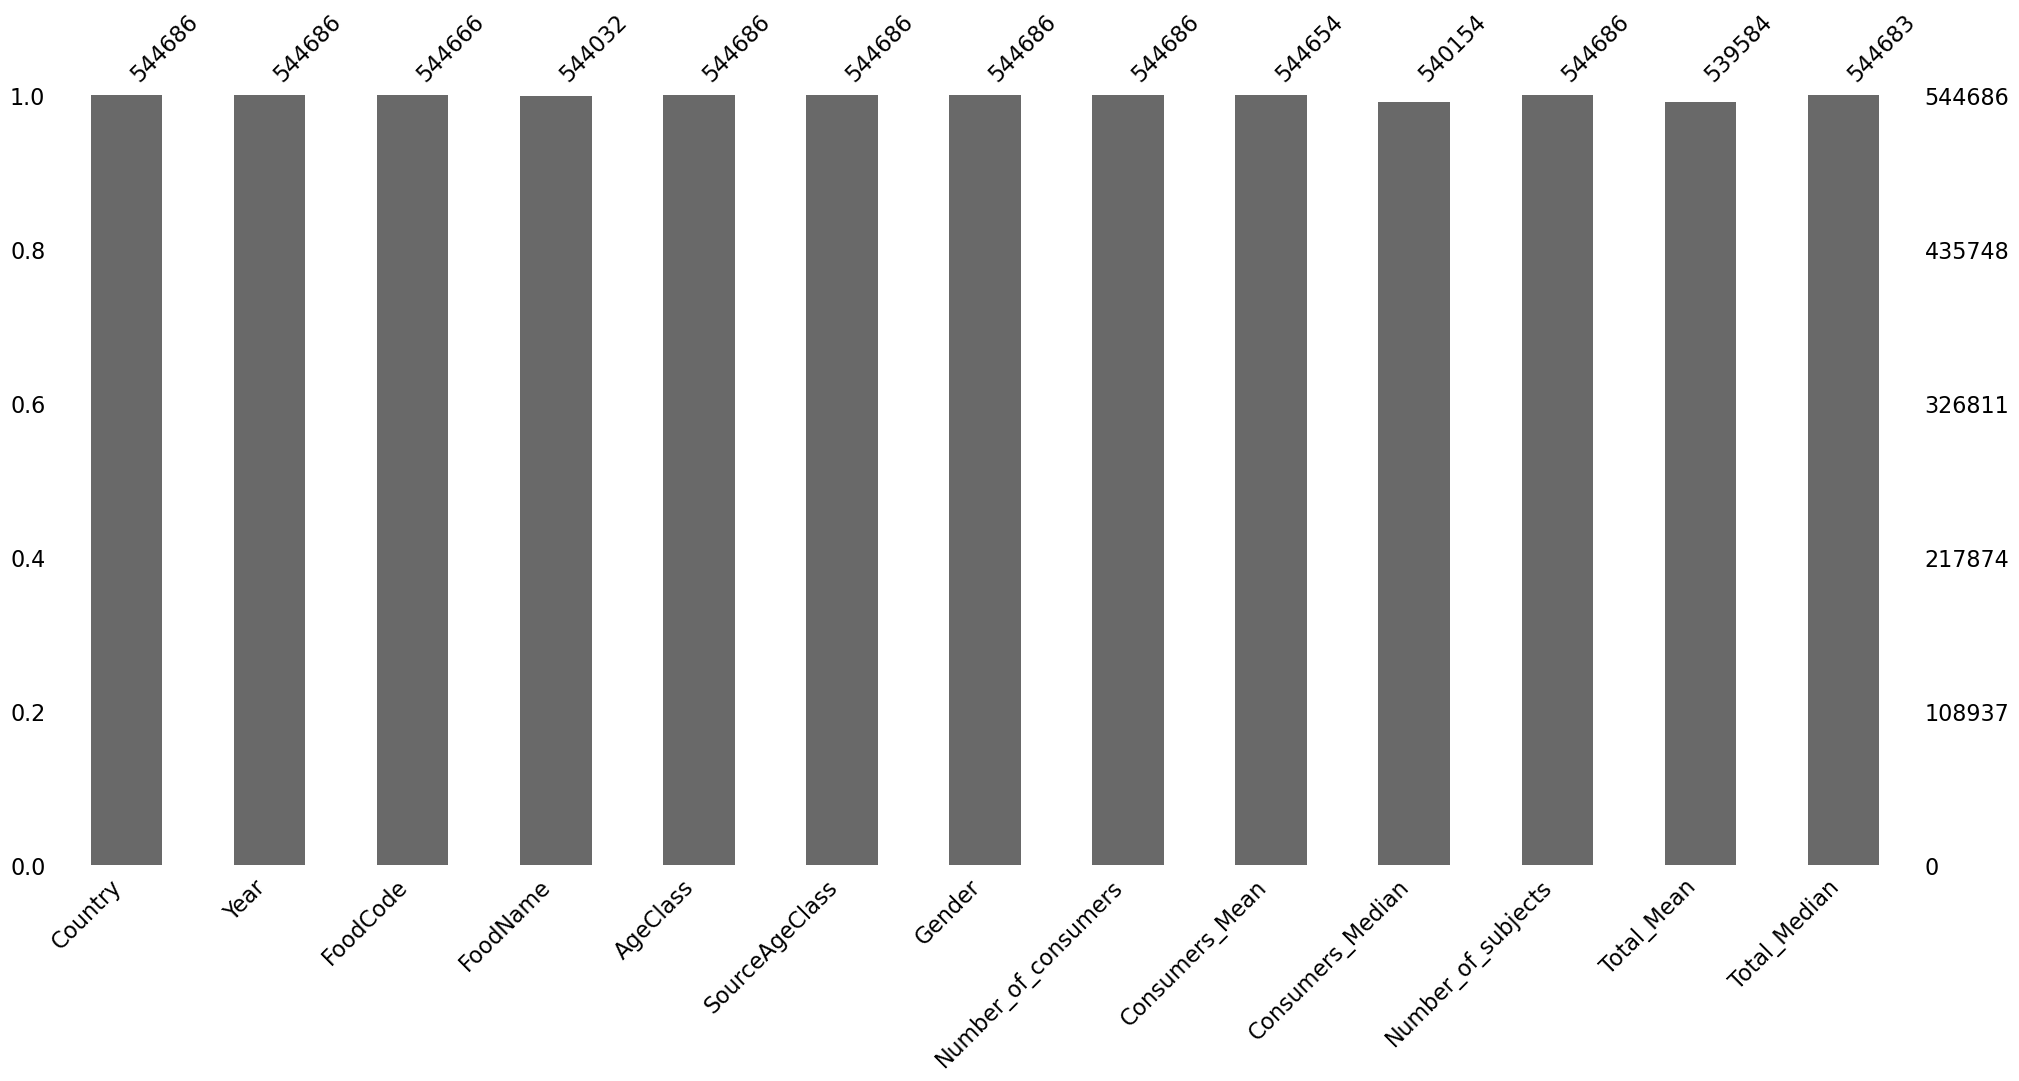

In [653]:
msno.bar(food)

In [654]:
food.isna().sum()

Country                   0
Year                      0
FoodCode                 20
FoodName                654
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### zarówno na wykresie jak i w tabeli widać że FoodName i FoodCode mają puste wartości (na razie nie zajmujemy sie innymi koumnami z pustymi watościami bo nie wiedomo czy będą użyteczne) wiec zajmujemy sie usunięciem tych rzędów 

In [655]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail() # NaN w FoodCode widać dopiero na 50 ale dla wygody pozostaje default

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median
540608,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,3-5 years,All,692,2.26,0.84,804,1.95,0.59
540609,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Children and Adolescents,6-14 years,All,1937,1.89,0.81,2376,1.54,0.48
540610,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,15-49 years,All,6798,1.80,0.76,8253,1.48,0.48
540611,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,50-74 years,All,6054,2.04,0.76,7069,1.74,0.49
540612,Republic of Korea,2015,fa6adbfab52e8a77f23df411f59c2150,NaN,Adults and Elderly,>75 years,All,1204,1.97,0.40,1650,1.44,0.11


In [656]:
food.iloc[527543]

Country                Democratic Republic of the Congo
Year                                               2016
FoodCode                                            NaN
FoodName                                            NaN
AgeClass                             Adults and Elderly
SourceAgeClass                              15-49 years
Gender                                              All
Number_of_consumers                                   1
Consumers_Mean                                     3.36
Consumers_Median                                   3.36
Number_of_subjects                                  214
Total_Mean                                         0.02
Total_Median                                       0.00
Name: 527543, dtype: object

### tutaj widzimy że FoodName i FoodCode puste dane są opisane jako NaN, dodatkowo jest jeszcze długi kod który jest taki sam w każdym rzędzie, także usunę FoodName i zobaczę czy nadal te kody pozostały jeżeli one nie opisują żadnego produktu to one także zostaną usunięte. prawdopodobnie własnie z powodu błędnego kodu produktu nie ma nazwy produktu

In [657]:
food = food.dropna(subset=['FoodName'])

In [658]:
food.isna().sum()      

Country                   0
Year                      0
FoodCode                  0
FoodName                  0
AgeClass                  0
SourceAgeClass            0
Gender                    0
Number_of_consumers       0
Consumers_Mean           32
Consumers_Median       4532
Number_of_subjects        0
Total_Mean             5102
Total_Median              3
dtype: int64

### wychodzi że nie ma już pustych danych. poprzez usuwanie pustych danych w FoodName pozbyliśmy sie równiez tych z FoodCode co znaczy żę po części było to tylko zależne.  jednak jeszcze trzeba sprawdzić czy produkty które miały kod fa6adbfab52e8a77f23df411f59c2150 też zostału usunięte wstępnie z tego co widać poprawne kody nie śa dłuższe niz 5 znaków także sprawdzam czy istnieją dłuższe kody w kolumnie FoodCode

In [659]:
food.loc[food['FoodCode'] == "fa6adbfab52e8a77f23df411f59c2150"]
temp = food['FoodCode'].str.len() > 5
temp.value_counts()

FoodCode
False    537902
True       6130
Name: count, dtype: int64

### wygląda na to że tego konkretnego kodu sie pozbyłem ale kody których dlugoś jest większa od 5 nadal istnieją i pytanie czy one są poprawne czy nie

In [660]:
checkpoint = food #tworzę checkpoint żeby móc łatwo wrócić do wersji przed sortowaniem
food['CodeLen'] = food['FoodCode'].str.len()
food.sort_values(by=['CodeLen'])

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
361304,Spain,2004,A01DM,Medlars,Children and Adolescents,Other children,Male,1,0.48,0.48,205,0.00,0.00,5
361303,Spain,2004,A01DJ,Apples,Children and Adolescents,Other children,Male,62,3.53,2.95,205,1.07,0.00,5
361302,Spain,2004,A01DJ,Apples,Children and Adolescents,Other children,Female,76,3.21,2.75,194,1.26,0.00,5
361301,Spain,2004,A01JT,"Kiwi fruits (green, red, yellow)",Children and Adolescents,Other children,Male,8,1.84,1.64,205,0.07,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265753,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),All,All,female,152,59.14,43.12,559,16.08,0.00,32
265752,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),Children and Adolescents,6-14 years,female,0,0.00,0.00,1,0.00,0.00,32
265751,Uganda,2010,17348df7c5044de2950b5bce2d8bb912,(All Meat and meat products),Adults and Elderly,50-74 years,female,11,56.55,37.35,40,15.55,0.00,32
527245,Bolivia (Plurinational State of),2011,80342da971f1dbf98f4f2d66658e28e6,(All Milk and dairy products),Children and Adolescents,3-5 years,female,3,1.56,1.71,4,1.17,1.06,32


In [661]:
temp = food.loc[food['FoodCode'] == "a93a0316b93a7c2af9305e90012af119"]
len(temp)

478

### wygląda na to że nie wszystkie kody o dlugości 32 są błędne wiec sama długość nie jest powodem pustych danych
### teraz sprawdzę czy wszystkie grupy wiekowe i ilość consumerów skłądają sie na grupe wiekową All

In [662]:
food = checkpoint
food_all = food.loc[food['Gender'] == "All"]
food_all = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all = food_all.loc[food_all['Country'] == "China"]

food_all.head(20)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Consumers_Mean,Consumers_Median,Number_of_subjects,Total_Mean,Total_Median,CodeLen
0,China,2002,A000G,Oat grain,All,All,All,1157,60.62,0.00,66172,1.06,0.00,5
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,28.58,0.00,838,0.34,0.00,5
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,22.00,0.00,2235,0.20,0.00,5
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,39.97,0.00,9844,0.43,0.00,5
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,66.67,0.00,33719,1.08,0.00,5
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,62.06,0.00,18143,1.50,0.00,5
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,43.87,0.00,1393,1.17,0.00,5
279440,China,2002,A000G,Oat grain,All,All,All,1157,1.12,NaN,66172,NaN,0.00,5
280252,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,2.00,NaN,838,NaN,0.00,5
280691,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,1.31,NaN,2235,NaN,0.00,5


### już teraz widać ze są problemy. dane się powtarzają ale nie we wszystkich kolumnach. w przypadku all Number_of_consumers i Number_of_subjects jest taki sam ale inne kolumny albo nie maja danych albo maja inne. znaczy to że są tu powielone kolumny i trzeba pozbyć sie tych duplikatów. wygląda na to że najlepszym sposobem byłoby zrobienie tego usuwając rzędy w których jest NaN w Consumers_Median i Total_Mean tylko pytanie czy te kolumny są wiarygodne wiec trzeba sprawdzićczy te liczby są prawdziwe 
### jako że nie ma legendy jak dokładnie są liczone te wartości i co na pewno znaczą samemu spróbuje to zrozumieć a jeżeli nie będą one dawać poprawnych wyników to zostaną usunięte
### consumers mean 

In [663]:
1157/66172*100 # procent consumerów z całej puli subjectów 

1.748473674666022

In [664]:
66172/1157

57.19273984442524

In [665]:
(1.12+66172)/1157

57.193707865168534

In [666]:
food_all['Consumers_Mean'].iloc[0]

60.623

In [667]:
food_all['Consumers_Mean'].iloc[1:7].sum()

263.15090000000004

### nawet suma średnich nie daje odpowiedniego wyniku

In [668]:
food.shape

(544032, 14)

### żadne obliczenia nie daja takiej wartości jaka jest w bazie więc albo są to jakieś inne dane np średnia ilość gramów spożywanego produktu przez ankietowanych albo coś zupełnie innego ale bez odpowiedniej wiedzy nie można tego założyć. Znaczy to ze trzeba sie pozbyć tych kolumn gdyz nawet gdyby pomocne mogą one zawierać fałsyzwe wartości 
### uswam więc: Consumers_Mean, Consumers_Median, Total_Mean, Total_Median i dodatkowo CodeLen które i tak już nie beędzie użyteczne dla mnie

In [669]:
food = food.drop(['Consumers_Mean', 'Consumers_Median', 'Total_Mean', 'Total_Median', 'CodeLen'], axis=1)
food.shape

(544032, 9)

In [670]:
food

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
1,China,2002,A000G,Oat grain,All,All,female,608,33953
2,China,2002,A000G,Oat grain,All,All,male,549,32219
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
4,China,2002,A000N,Buckwheat,All,All,female,82,33953
...,...,...,...,...,...,...,...,...,...
544681,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Infants and Toddlers,0-35 months,All,0,519
544682,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Children and Adolescents,3-5 years,All,0,804
544683,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Children and Adolescents,6-14 years,All,0,2376
544684,Republic of Korea,2015,A16MR,"Juice concentrate, pineapple",Adults and Elderly,15-49 years,All,1,8253


### wszystko poszło dobrze, pozbyliśmy sie 5 kolumn wiec teraz czas na usuwanie duplikatów, zrobie to za pomocą drop.duplicates po prostu, powinno to teraz pozbyć sie rzędów w ktorych sa te same dane poniewaz ju nic innego nei powinno powodować tu błędów

In [671]:
food = food.drop_duplicates()
food.shape

(272016, 9)

In [672]:
544032-272016


272016

### z tego co widać dane były podwojone, jest to bardzo duża ilość wiec bardzo dobrze żę to zostało zauważone bo inaczej mogło by zakłamać wynik analizy
### teraz wreszczie mozna sprawdzić czy sumaw szystkich grup daje taki sam wynik jak dla grupy wiekowej all

In [673]:
food_all = food.loc[food['Gender'] == "All"]
food_all_oat = food_all.loc[food_all['FoodName'] == "Oat grain"]
food_all_oat_ch = food_all_oat.loc[food_all_oat['Country'] == "China"]
food_all_oat_ch.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,838
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,2235
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,9844
2487,China,2002,A000G,Oat grain,Adults and Elderly,15-49 years,All,545,33719
3267,China,2002,A000G,Oat grain,Adults and Elderly,50-74 years,All,438,18143
4020,China,2002,A000G,Oat grain,Adults and Elderly,>75 years,All,37,1393


In [674]:
food_all_oat_ch['Number_of_consumers'].iloc[1:].sum()

1157

In [675]:
food_all_oat_ch['Number_of_consumers'].iloc[0]

1157

### wychodzi na to że wsyzstko sie zgadza wiec czyszczenie danych sie powiodło wiec czas na grupowanie i wizualizacje
### tworzymy dataframes dla all, kobiet i mężczyzn 

In [676]:
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "female"]
food_men = food.loc[food['Gender'] == "male"]

### zrobie też od razu rodzielenie na wszystkie grupy wiekowe

In [677]:
food_all_all = food_all.loc[food_all['AgeClass'] == "All"]
food_fem_all = food_fem.loc[food_fem['AgeClass'] == "All"]
food_men_all = food_men.loc[food_men['AgeClass'] == "All"]
food_all_all.head()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
3,China,2002,A000N,Buckwheat,All,All,All,167,66172
6,China,2002,A000P,Barley grains,All,All,All,61,66172
9,China,2002,A000T,Maize grain,All,All,All,2422,66172
12,China,2002,A001B,Common millet grain,All,All,All,9069,66172


In [678]:
food_fem_all.head(5)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
1,China,2002,A000G,Oat grain,All,All,female,608,33953
4,China,2002,A000N,Buckwheat,All,All,female,82,33953
7,China,2002,A000P,Barley grains,All,All,female,28,33953
10,China,2002,A000T,Maize grain,All,All,female,1355,33953
13,China,2002,A001B,Common millet grain,All,All,female,4740,33953


### Wszystko wygląda dobrze wiec zajmę sie teraz sprawdzeniem z jakich krajów dane głownie były zbierane 

In [679]:
food_all_all['Country'].nunique()

23

In [680]:
food_all_all['AgeClass'].unique()

array(['All'], dtype=object)

In [681]:
food['Country'].unique()

array(['China', 'Republic of Korea', 'Cyprus', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland',
       'Latvia', 'Netherlands', 'Portugal', 'Romania', 'Slovenia',
       'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'United States of America', 'Brazil',
       'Italy', "Lao People's Democratic Republic", 'Mexico',
       'Mozambique', 'Malaysia', 'Nigeria', 'Pakistan', 'Philippines',
       'Burkina Faso', 'Bangladesh', 'Uganda',
       'Bolivia (Plurinational State of)', 'Zambia',
       'Democratic Republic of the Congo', 'Ethiopia', 'Guatemala',
       'India'], dtype=object)

In [682]:
food_fem_all['Country'].nunique()

23

In [683]:
food_men_all['Country'].nunique()

14

In [684]:
null_data = food[food.isnull().any(axis=1)]
null_data.tail()

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects


In [685]:
food_fr = food.loc[food['Country'] == "France"]
food_fr.head(10)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
37678,France,2007,A03MQ,Shandy,Children and Adolescents,Other children,Male,1,239
37679,France,2007,A03MX,"Wine, red",Children and Adolescents,Other children,Female,17,243
37680,France,2007,A03MX,"Wine, red",Children and Adolescents,Other children,Male,14,239
37681,France,2007,A03MV,"Wine, white",Children and Adolescents,Other children,Female,19,243
37682,France,2007,A03MV,"Wine, white",Children and Adolescents,Other children,Male,13,239
37683,France,2007,A03ND,Cider,Children and Adolescents,Other children,Female,3,243
37684,France,2007,A037V,Pork lard,Children and Adolescents,Other children,Female,14,243
37685,France,2007,A037V,Pork lard,Children and Adolescents,Other children,Male,9,239
37686,France,2007,A038G,"Duck fat, processed",Children and Adolescents,Other children,Male,3,239
37687,France,2007,A038H,"Goose fat, processed",Children and Adolescents,Other children,Female,14,243


In [686]:
food_fr['SourceAgeClass'].unique()

array(['Other children', 'Adolescents', 'Adults', 'Elderly',
       'Very elderly', 'Infants', 'Toddlers'], dtype=object)

In [687]:
food['AgeClass'].unique()

array(['All', 'Infants and Toddlers', 'Children and Adolescents',
       'Adults and Elderly'], dtype=object)

In [688]:
food_fr = food_fr.loc[food_fr['Gender'] == "All"]

### tutaj zauważyłem że nie wszystkei kraje mają AgeClass. wychodzi na to żę aż 18 krajów nie ma 

In [689]:
food_fr['Number_of_subjects'].unique().sum()

8539

### musze założyć że są unikalne dane w Number_of_subjects ze kazda unikalna to inne badanie wiec można dodać unikalne i dowiedzieć sie w ten sposob jak dużo jest badanych z danego kraju bo mało prawdopodobne żeby rózne badania miały dokładnuie taka samą ilość kandydatów

In [690]:
food_ctry = food_all.groupby(['Country','Number_of_subjects']).sum().reset_index()
food_ctry = food_ctry.groupby(['Country']).sum().reset_index()
food_ctry.loc[food_ctr['Country'] == "France"]

,Country,Number_of_subjects,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers
15,France,8539,15546648,A036PA036VA037DA039CA03LGA03HGA03HHA032BA032CA...,"Olive oilsRape seed oil, edibleSunflower seed ...",Infants and ToddlersInfants and ToddlersInfant...,InfantsInfantsInfantsInfantsInfantsInfantsInfa...,AllAllAllAllAllAllAllAllAllAllAllAllAllAllAllA...,503329


### Dopiero w taki sposob moge to obejść i dziki temu widze ile osob brało udział z każdego kraju

In [691]:
food_ctry = food_ctry.sort_values(by='Number_of_subjects', ascending=False)
food_ctry['Country'].nunique()

41

### ilość krajów pozostała taka jak powinna wiec nic nie znikneło i mam podusmowane dobrze ilości subjectów

In [692]:
most_sub_ctry = food_ctry[['Country','Number_of_subjects']]
most_sub_ctry

,Country,Number_of_subjects
4,Brazil,143942
7,China,132344
39,United States of America,49346
32,Republic of Korea,41342
25,Mexico,21366
21,Italy,12616
27,Netherlands,10900
12,Denmark,8563
15,France,8539
38,United Kingdom,7480


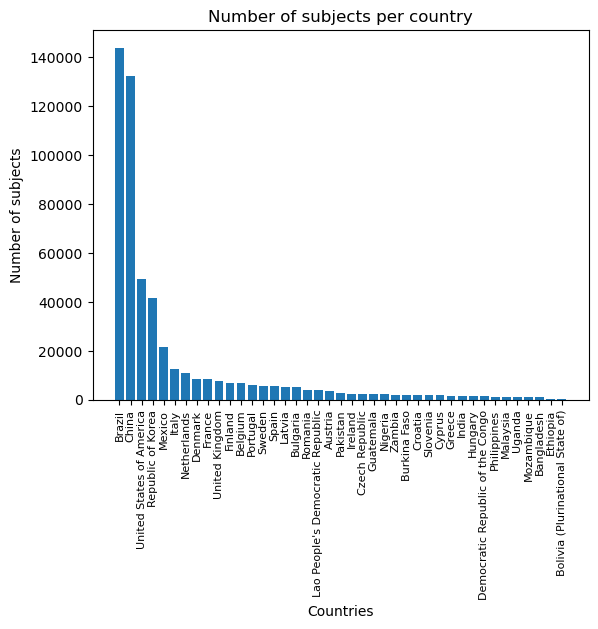

In [693]:
plt.bar(most_sub_ctry['Country'], most_sub_ctry['Number_of_subjects'])
plt.xticks(most_sub_ctry['Country'], rotation='vertical', size=8)
plt.ylabel("Number of subjects")
plt.xlabel("Countries")
plt.title("Number of subjects per country")
plt.show()

### Na wykresie bardzo dobrze widać jak duża jest dysproporcja co do ilości osob w zależności od kraju. Od razu to wskazuje że wyciągnięte wnioski mogą być zachwiane przez to wiec należy wziać to pod uwagę
### Dla dokładności sprawdzę jak duża jest to różnica i jak rozkłada się to pod względem kontynentów

In [694]:
top5 = most_sub_ctry['Number_of_subjects'].iloc[0:5].sum()
top5

388340

In [695]:
rest = most_sub_ctry['Number_of_subjects'].iloc[5:].sum()
rest

134711

In [696]:
top5/rest

2.882763842596373

### jak widać top5 krajów ma prawie 3 razy wiecej badancyh niż reszta krajów jest to bardzo duża dysporporcja wiec ogolna analiza nie jest aż tak wartościowa 
### dobrze bedzie rozbić to na kontynenty dla łatwiejszej analizy 

In [697]:
#przypisawanie kontynentu 

In [698]:
def convert(row):
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format="default")
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

### trzeba zamienić nazwy Korei i Bolivii bo w tej package inaczej po prostu te kaje są nnazwane niż w tej bazie danych

In [707]:
continent = food
continent['Country'] = continent['Country'].replace('Republic of Korea','South Korea')
continent['Country'] = continent['Country'].replace('Bolivia (Plurinational State of)','Bolivia')

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/1263514609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Country'] = continent['Country'].replace('Republic of Korea','South Korea')
/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/1263514609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Country'] = continent['Country'].replace('Bolivia (Plurinational State of)','Bolivia')


In [708]:
continent['Continent'] = continent.apply(convert, axis=1)
continent

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/2657007479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Continent'] = continent.apply(convert, axis=1)


,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,Continent
0,China,2002,A000G,Oat grain,All,All,All,1157,66172,AS
1,China,2002,A000G,Oat grain,All,All,female,608,33953,AS
2,China,2002,A000G,Oat grain,All,All,male,549,32219,AS
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,AS
4,China,2002,A000N,Buckwheat,All,All,female,82,33953,AS
...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,All,All,female,8,242,AS
272339,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,Adults and Elderly,15-49 years,All,8,242,AS
272340,India,2015,A0F4S,Coconut water,All,All,All,7,242,AS
272341,India,2015,A0F4S,Coconut water,Adults and Elderly,15-49 years,female,7,242,AS


### mamy kody kontynentów wiec niby można by tak to zostawić ale uważam że dużo ładniej i czytelniej jest jak będa nazwy kontynentów

In [709]:
continent['Continent'].unique()

array(['AS', 'EU', 'NA', 'SA', 'AF'], dtype=object)

In [710]:
conti_names = {	
				'AS':'Asia',
				'EU' : 'Europe',
                'NA' : 'North America',
                'SA' : 'South America',
                'AF' : 'Africa'
                }
continent['Continent'] = continent['Continent'].map(conti_names)
continent

/var/folders/bn/4gzz860947dgjqc4dxn4_1_40000gp/T/ipykernel_71433/76376622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent['Continent'] = continent['Continent'].map(conti_names)


,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects,Continent
0,China,2002,A000G,Oat grain,All,All,All,1157,66172,Asia
1,China,2002,A000G,Oat grain,All,All,female,608,33953,Asia
2,China,2002,A000G,Oat grain,All,All,male,549,32219,Asia
3,China,2002,A000N,Buckwheat,All,All,All,167,66172,Asia
4,China,2002,A000N,Buckwheat,All,All,female,82,33953,Asia
...,...,...,...,...,...,...,...,...,...,...
272338,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,All,All,female,8,242,Asia
272339,India,2015,A0EQN,Soft drinks with minor amounts of fruits or fl...,Adults and Elderly,15-49 years,All,8,242,Asia
272340,India,2015,A0F4S,Coconut water,All,All,All,7,242,Asia
272341,India,2015,A0F4S,Coconut water,Adults and Elderly,15-49 years,female,7,242,Asia


In [716]:
continent['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'South America', 'Africa'],
      dtype=object)

### jak widać wszystko ładnie się udało wiec moge przypisać to do głownej i ponownie stworzyć dataframes dla każdej płci

In [714]:
food = continent
food_all = food.loc[food['Gender'] == "All"]
food_fem = food.loc[food['Gender'] == "female"]
food_men = food.loc[food['Gender'] == "male"]

### teraz zajmę się sprawdzeniem jakie produkty są najpopularniejsze

In [699]:
food_all_all = food_all_all.groupby('FoodName').sum('Number_of_consumers')
food_all_all = food_all_all.sort_values(by='Number_of_consumers', ascending=False)
food_all_all = food_all_all.reset_index() # trzeba tego użyć bo zamienia to co jest w groupby na index i nie da sie wyszukać kolumny
food_all_all.head(10)

,FoodName,Year,Number_of_consumers,Number_of_subjects
0,(All Cereals),44259,142214,144380
1,"Rice grain, polished",24133,86788,114034
2,"Wheat bread and rolls, white (refined flour)",32180,74405,161625
3,Rice grain,22120,71867,127673
4,Pig fresh meat,36197,70966,137271
5,(All Vegetables),42249,70128,72409
6,(All Herbs),40236,66181,72086
7,(All Fats),42249,64221,72409
8,(All Beverages),42249,61336,72409
9,Wheat flour,12062,60651,123981


In [700]:
food_temp = food.loc[food['FoodName'] == "Oat grain"]
food_temp.head(20)

,Country,Year,FoodCode,FoodName,AgeClass,SourceAgeClass,Gender,Number_of_consumers,Number_of_subjects
0,China,2002,A000G,Oat grain,All,All,All,1157,66172
1,China,2002,A000G,Oat grain,All,All,female,608,33953
2,China,2002,A000G,Oat grain,All,All,male,549,32219
812,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,All,10,838
813,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,female,4,376
814,China,2002,A000G,Oat grain,Infants and Toddlers,0-35 months,male,6,462
1251,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,All,20,2235
1252,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,female,9,976
1253,China,2002,A000G,Oat grain,Children and Adolescents,3-5 years,male,11,1259
1782,China,2002,A000G,Oat grain,Children and Adolescents,6-14 years,All,107,9844


### jak widać nawet w bazach danych branych z źródeł które wydawały by się mieć je bardzo dobrze wyczyszczone i bez błędów nadal one mogą występować i nie nalezy brać za pewnik że wszystko bedzie dobrze, samemu należy to sprawdzać zawsze bo błędy mogą występować 